<a href="https://colab.research.google.com/github/owen-wang-student/tensorflow-practice/blob/main/clothing_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Creating Dataset

In [45]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [19]:
# Import data (pre-sorted)
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [29]:
# Normalize Data
train_data = train_data / 255.0
test_data = test_data / 255.0

In [30]:
# Visualize first training example
print(f"Training sample: \n{train_data[0]}\n")
print(f"Training sample: \n{train_labels[0]}\n")

Training sample: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
 

In [31]:
# Check the shape of the dataset
train_data.shape, train_labels.shape # data = 28x28 images, labels = number that corresponds to clothing

((60000, 28, 28), (60000,))

In [32]:
# Create a list so we can index training labels -> human-readable name
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Ankle boot')

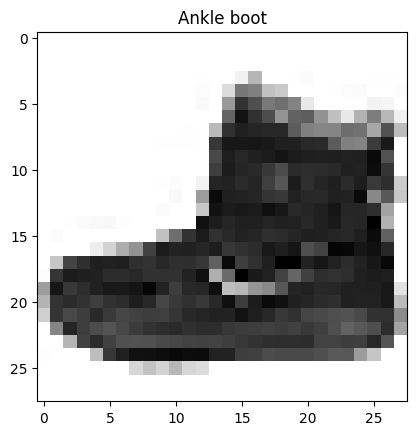

In [33]:
# Plot a single sample
plt.imshow(train_data[0], cmap=plt.cm.binary)
plt.title(class_names[train_labels[0]])

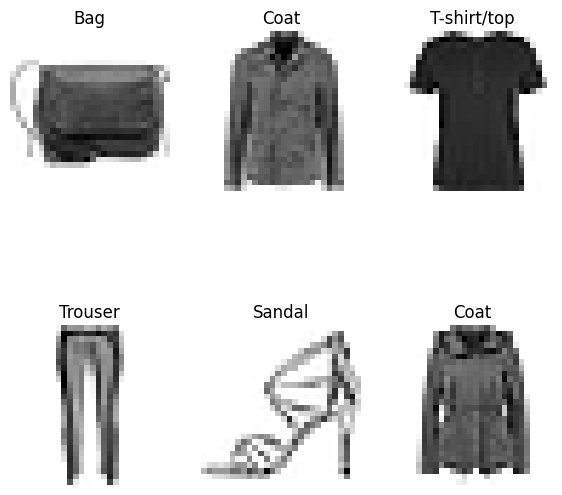

In [35]:
# For larger datasets its goof to randomly plot to validate
import random
plt.figure(figsize=(7, 7))
for i in range(6):
  plt.subplot(2, 3, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Creating Model

In [37]:
# Set random seed
tf.random.set_seed(42)

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile Model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # because labels are not one hot encoded
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

# Fit Model
history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2971 - loss: 1.7831 - val_accuracy: 0.6211 - val_loss: 0.9768
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6329 - loss: 0.9211 - val_accuracy: 0.6445 - val_loss: 0.8463
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6529 - loss: 0.8260 - val_accuracy: 0.6561 - val_loss: 0.8090
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6847 - loss: 0.7826 - val_accuracy: 0.6993 - val_loss: 0.7456
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7124 - loss: 0.7216 - val_accuracy: 0.7098 - val_loss: 0.7104
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7211 - loss: 0.6848 - val_accuracy: 0.7260 - val_loss: 0.6663
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7447 - loss: 0.6385 - val_accuracy: 0.7671 - val_loss: 0.6341
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7799 - loss: 0.6034 - 

In [38]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

## Visualize Loss Curve


Text(0.5, 1.0, 'Normailzed Data Classification')

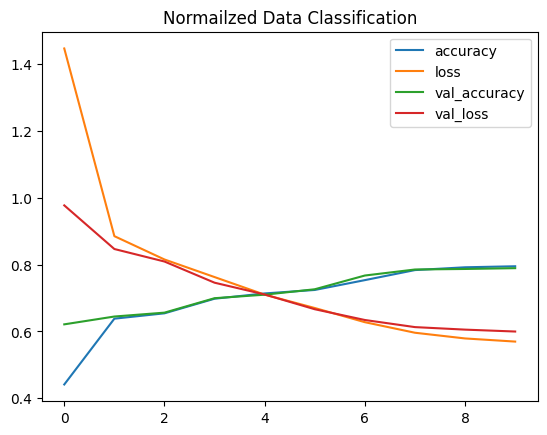

In [41]:
pd.DataFrame(history.history).plot()
plt.title("Normailzed Data Classification")

## Finding Ideal Learning Rate

In [44]:
# Set random seed
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile Model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # because labels are not one hot encoded
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit Model
lr_history = model_2.fit(train_data, train_labels, epochs=40, validation_data=(test_data, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4745 - loss: 1.4418 - val_accuracy: 0.7199 - val_loss: 0.7736 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7384 - loss: 0.7269 - val_accuracy: 0.7554 - val_loss: 0.6703 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7722 - loss: 0.6333 - val_accuracy: 0.7859 - val_loss: 0.6073 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7998 - loss: 0.5789 - val_accuracy: 0.7922 - val_loss: 0.5876 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8070 - loss: 0.5584 - val_accuracy: 0.7985 - val_loss: 0.5746 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8099 - loss: 0.5459 - val_accuracy: 0.8026 - val_loss: 0.5643 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8127 - l

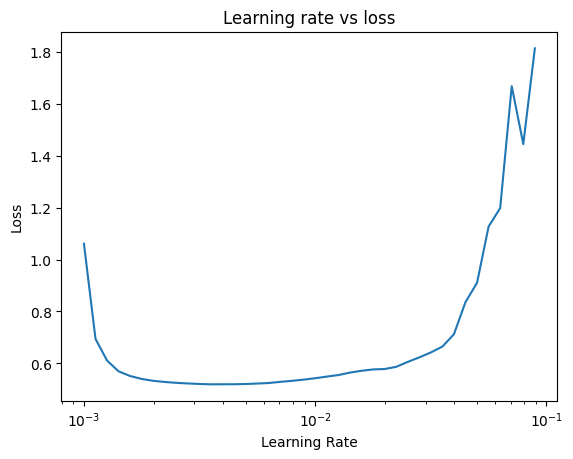

In [46]:
# Plot the learning rate curve
lrs = 1e-3 * (10**(np.arange(40)/20))

plt.semilogx(lrs, lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")
plt.show()

## Evaluating Model

In [67]:
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, text_size, classes=None, figsize=(10, 10), norm=False, savefig=False):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  if(classes):
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Label the axes
  ax.set(title="Confustion matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [56]:
# Make some predictions with our model
y_probs = model.predict(test_data)
y_probs.shape

# Convert all the predition probabiltiies into integers
y_preds = y_probs.argmax(axis=1)
y_preds.shape, y_preds[:10], test_labels[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


((10000,),
 array([9, 2, 1, 1, 6, 1, 4, 4, 5, 7]),
 array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

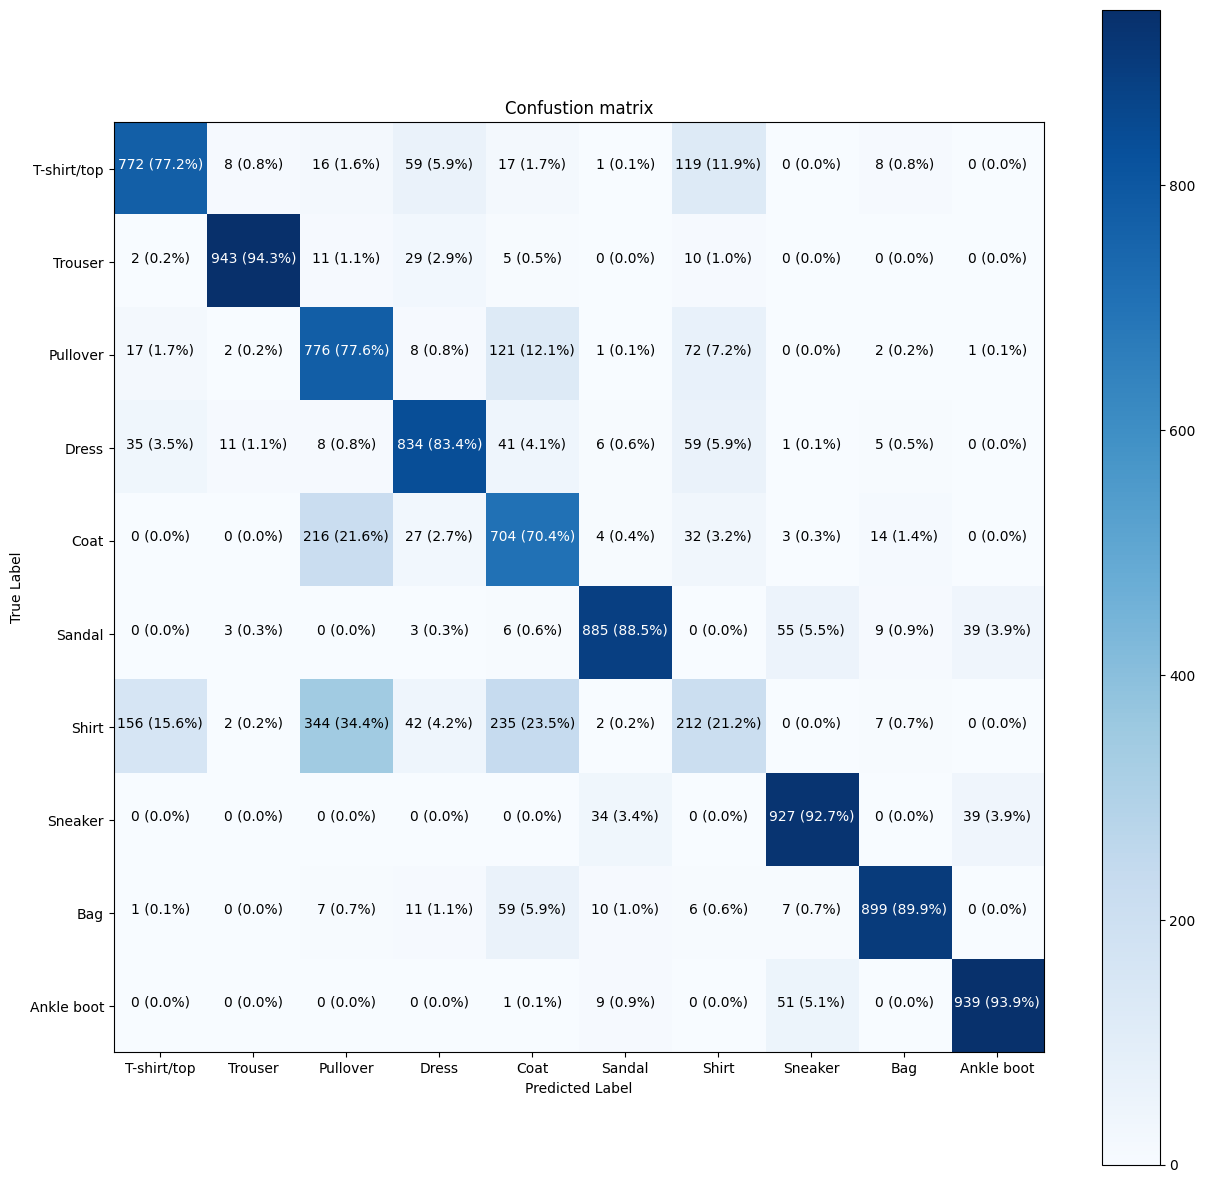

In [69]:
make_confusion_matrix(y_true=test_labels, y_pred=y_preds, classes=class_names, figsize=(15, 15), text_size=10)

## Plotting random predictions

In [70]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


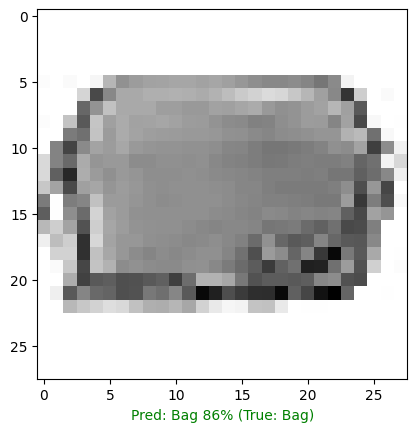

In [80]:
# Checkout a random image as well as its prediction
plot_random_image(model=model, images=test_data, true_labels=test_labels, classes=class_names)

## What patterns is the model learning

In [81]:
# Find the layers of out most recent model
model.layers

[<Flatten name=flatten_2, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [82]:
# Extract a particular layer
model.layers[1]

<Dense name=dense_9, built=True>

In [83]:
# Get the patterns of a layer
weights, biases = model.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.10283714, -0.21382512,  0.0644331 ,  0.2482044 ],
        [-0.08914582, -0.5467903 , -0.12301417,  0.15815383],
        [-0.47063068,  0.22417313, -0.2975777 , -0.10622355],
        ...,
        [-0.27840793, -0.19597031, -0.2828254 ,  0.20145966],
        [-0.07973214, -0.35056233,  0.3065984 , -0.18335663],
        [-0.2684293 , -0.22038704, -0.19179283,  0.02169286]],
       dtype=float32),
 (784, 4))

In [84]:
# Bias and biases shapes
biases, biases.shape

(array([1.1493951 , 0.59908646, 1.0636195 , 1.4957707 ], dtype=float32), (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector also gets initialized as zeros (for tensorflow dense layer)

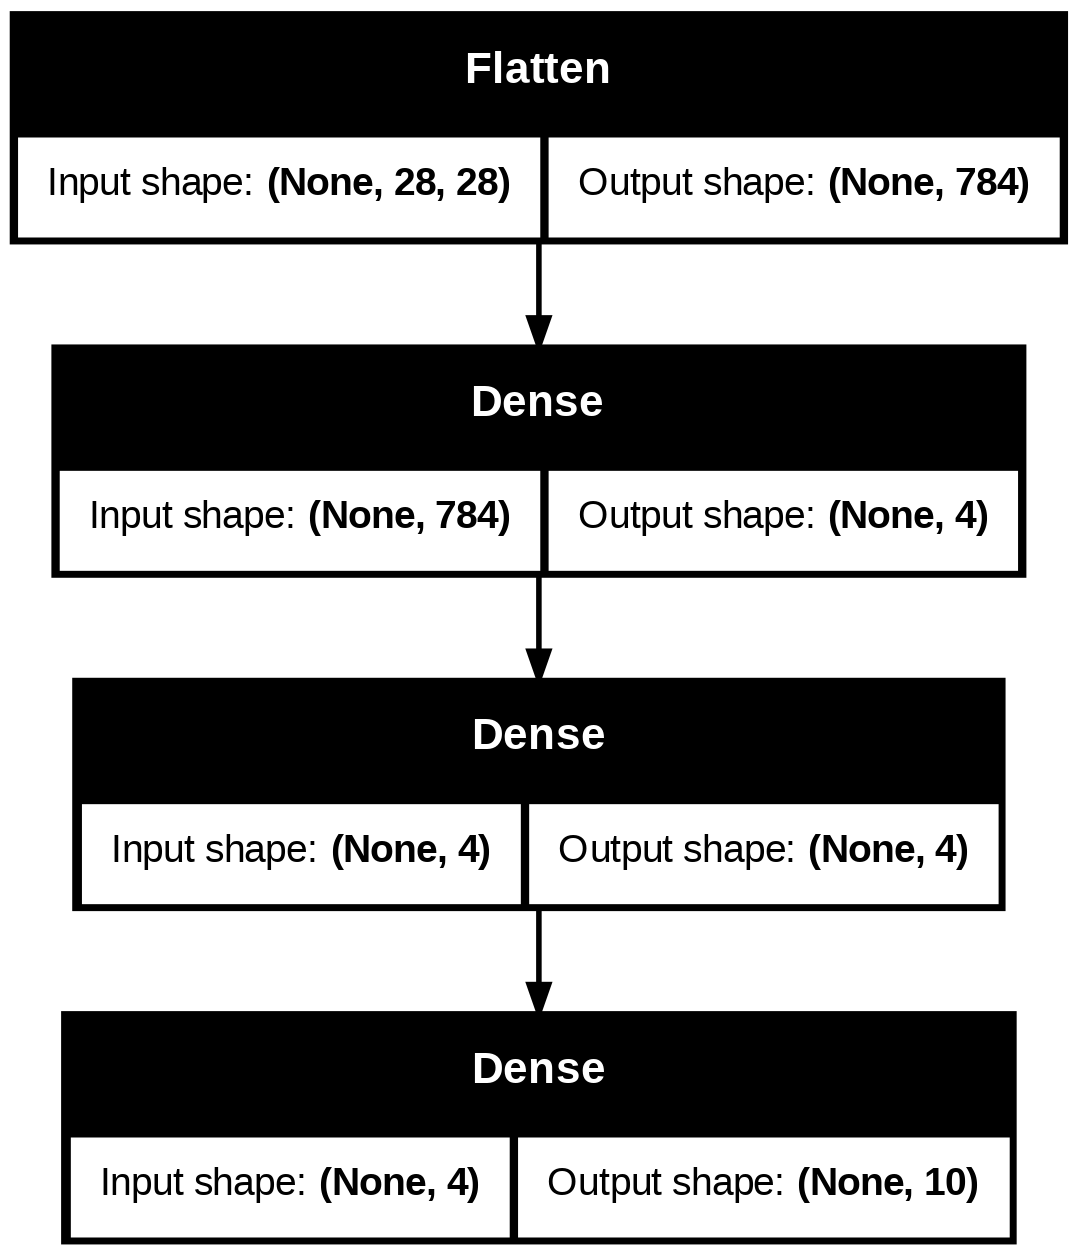

In [85]:
# View deep learning model input/outputs
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)